In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score   
import math

%matplotlib inline

In [2]:
sales_train_raw = pd.read_csv('../resources/sales_train_v2.csv')

In [109]:
sales_train = sales_train_raw.copy()

In [110]:
sales_train_0_item = sales_train_raw.copy()

In [111]:
sales_train_0_item['item_cnt_day'] = 0

In [112]:
shop_id_list = sorted(sales_train.shop_id.unique())

In [7]:
# shop IDs : 0-59

In [113]:
shops_excluded = [0, 1, 8, 9, 11, 13, 17, 20, 23, 29, 30, 32, 33, 36, 40, 43, 54]

In [116]:
shop_t = [0] * len(shop_id_list)
for i in shop_id_list:
    shop_t[i] = sales_train[sales_train['shop_id'] == i]

In [117]:
for i in shop_id_list:
    print('shop' + str(i))
    print(shop_t[i]['date_block_num'].unique())

shop0
[0 1]
shop1
[0 1]
shop2
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
shop3
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
shop4
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
shop5
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33]
shop6
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
shop7
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
shop8
[0 1 2 3]
shop9
[ 9 21 27 33]
shop10
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 26 27 28 29 30 31 32 33]
shop11
[25]
shop12
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
shop13
[ 0  1  2  3  4  5  6  7  8  9 10 11 

In [8]:
shop = [0] * len(shop_id_list)
for i in shop_id_list:
    shop[i] = [sales_train[sales_train['shop_id'] == i], sales_train_0_item[sales_train['shop_id'] != i]]
    shop[i] = pd.concat(shop[i])

In [10]:
# Shop ID with 0 item for 34th month - 0, 1, 8, 9, 11, 13, 17, 20, 23, 29, 30, 32, 33, 36, 40, 43, 54

In [11]:
shops_excluded = [0, 1, 8, 9, 11, 13, 17, 20, 23, 29, 30, 32, 33, 36, 40, 43, 54]

In [12]:
shop_item_mc = [0] * len(shop_id_list)
for i in shop_id_list:
    shop_item_mc[i] = shop[i].groupby(['date_block_num'])['item_cnt_day'].agg(sum)

C:\Anaconda2\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


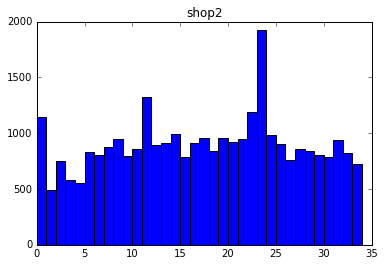

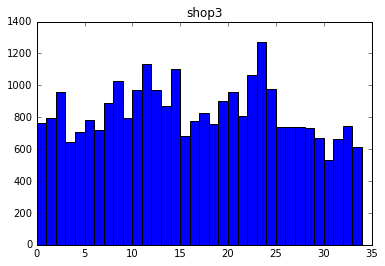

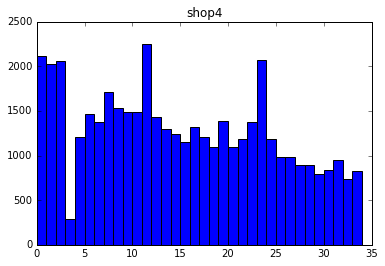

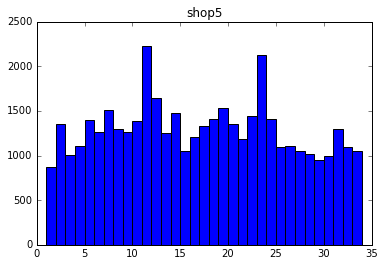

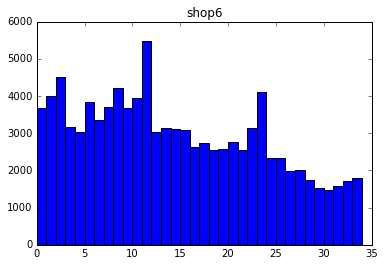

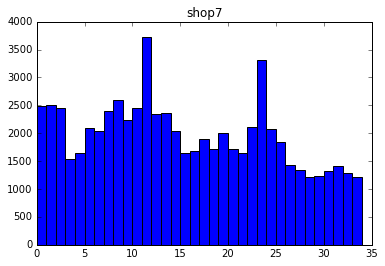

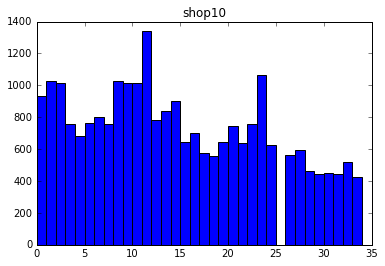

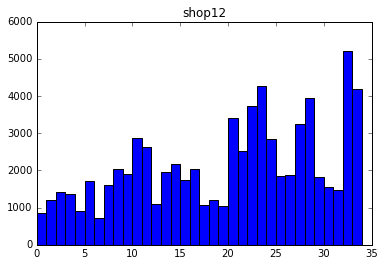

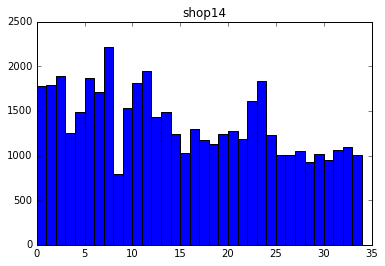

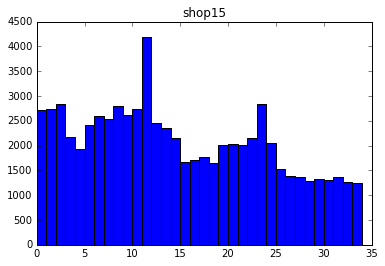

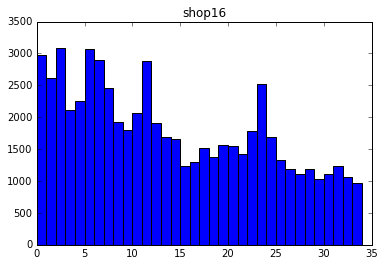

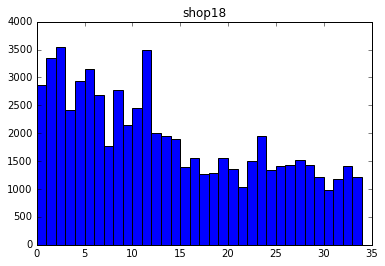

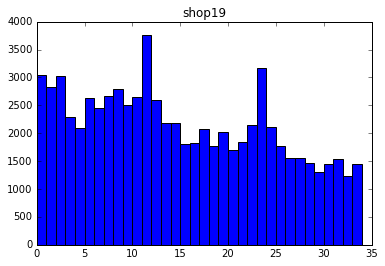

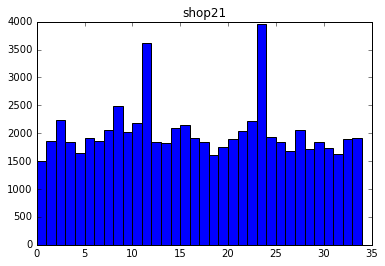

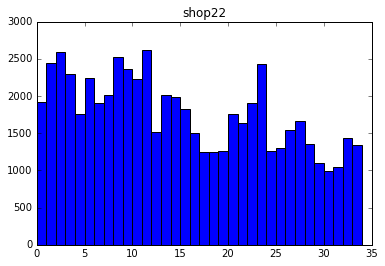

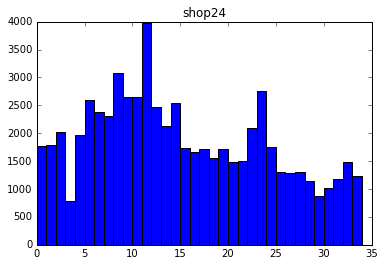

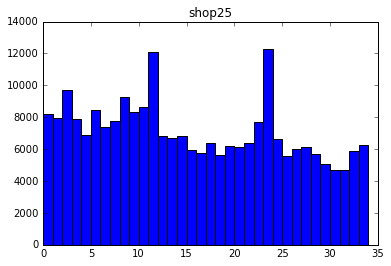

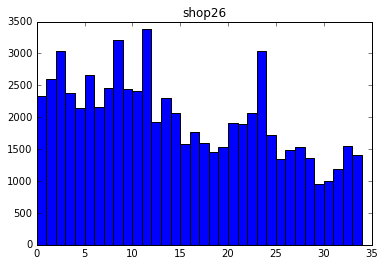

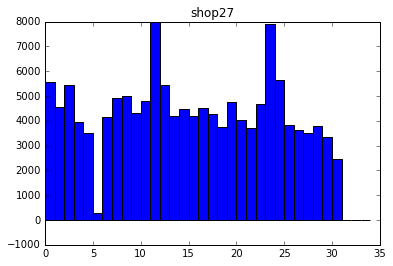

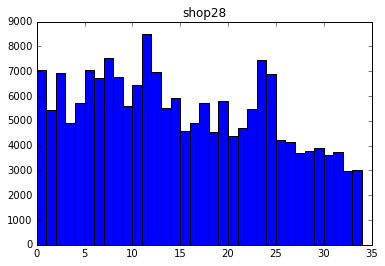

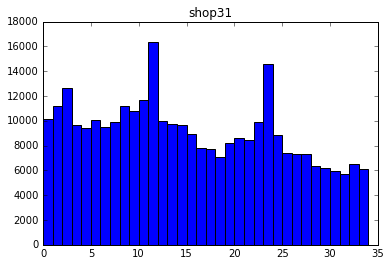

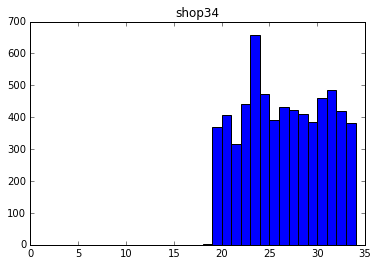

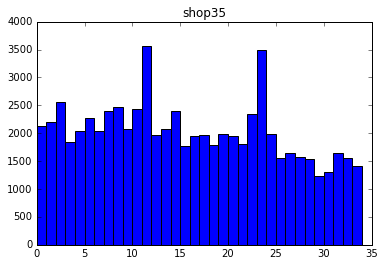

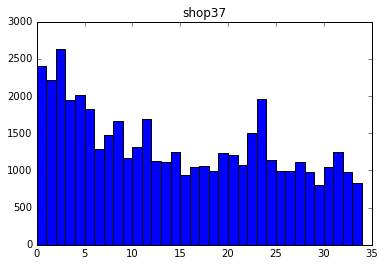

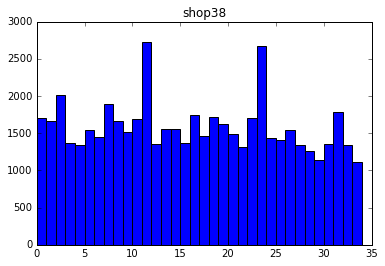

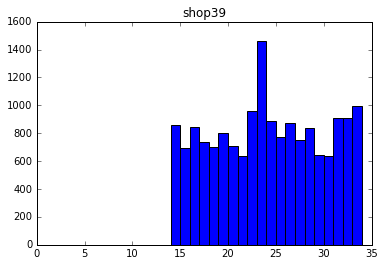

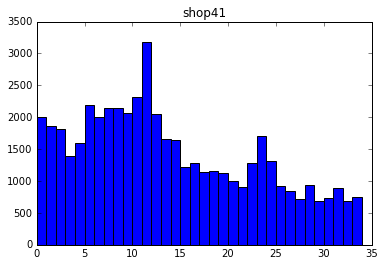

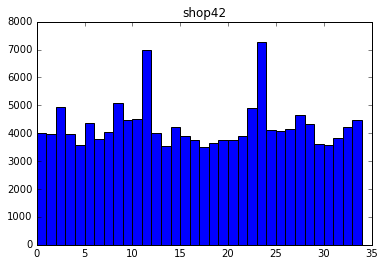

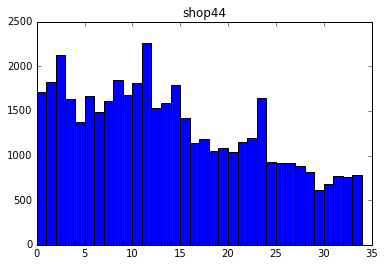

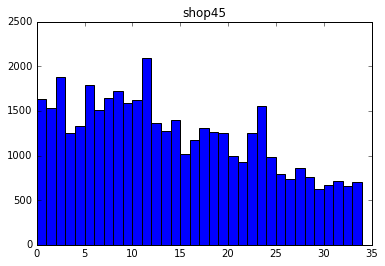

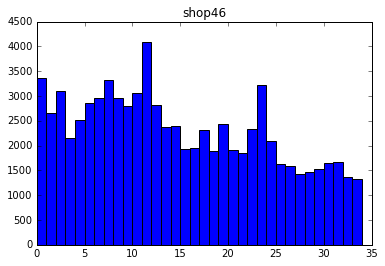

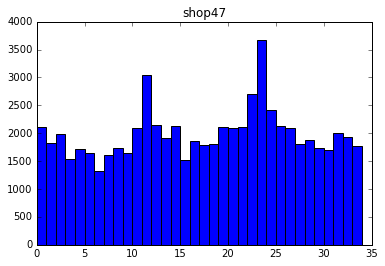

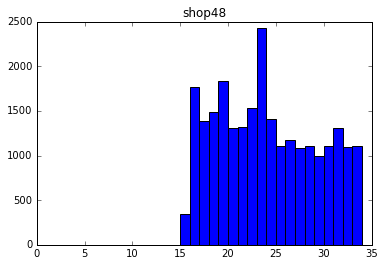

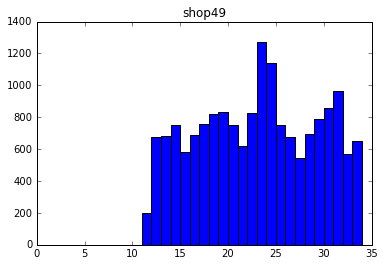

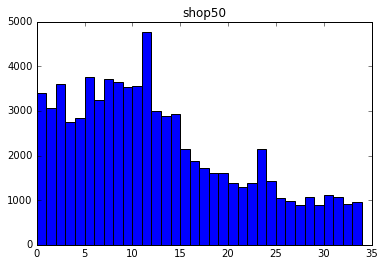

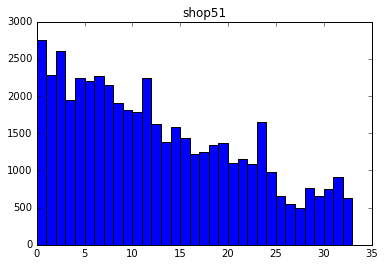

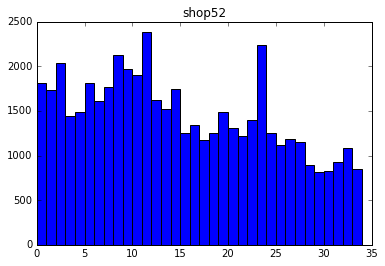

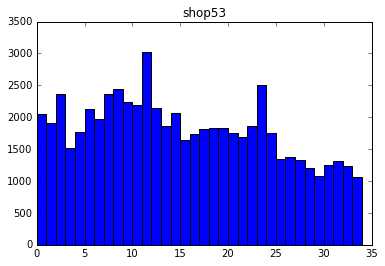

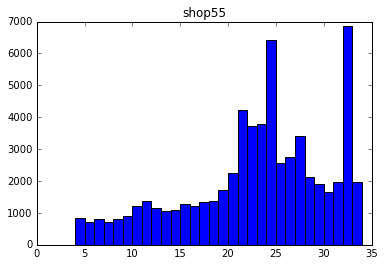

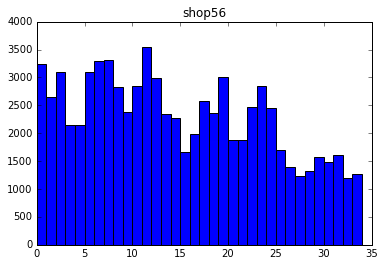

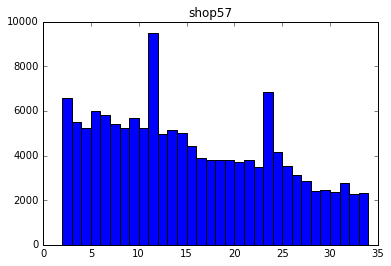

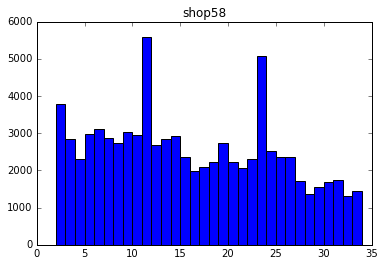

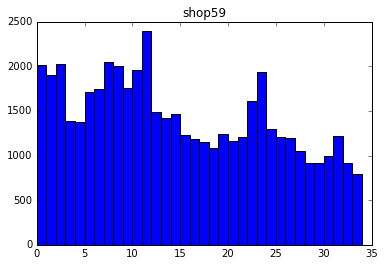

In [13]:
for i in shop_id_list:
    if i not in shops_excluded:
        plt.figure()
        plt.title('shop' + str(i))
        plt.bar(shop_item_mc[i].index,shop_item_mc[i],1, color = 'blue')

In [14]:
shop_ana_df = [0] * len(shop_id_list)
X_shop = [0] * len(shop_id_list)
y_shop = [0] * len(shop_id_list)
lr_shop = [0] * len(shop_id_list)
scores_shop = [0] * len(shop_id_list)
rmse_shop = [0] * len(shop_id_list)
for i in shop_id_list:
    shop_ana_df[i] = shop[i].groupby(['date_block_num','item_id'])['item_cnt_day'].agg(sum).reset_index(['date_block_num','item_id'])
    X_shop[i] = shop_ana_df[i][['date_block_num','item_id']]
    X_shop[i]['shop_id'] = i
    y_shop[i] = shop_ana_df[i]['item_cnt_day']
    lr_shop[i] = LinearRegression()
    scores_shop[i] = cross_val_score(lr_shop[i],X_shop[i],y_shop[i],cv=10,scoring="neg_mean_squared_error")
    rmse_shop[i] = math.sqrt(abs(scores_shop[i].mean()))

In [49]:
test_raw = pd.read_csv('../resources/test.csv')

In [50]:
test = test_raw.copy()

In [51]:
test['date_block_num'] = 34

In [52]:
test_f = test.loc[:,test.columns != 'ID']

In [118]:
pred = [0] * len(shop_id_list)
for i in shop_id_list:
    lr_shop[i].fit(X_shop[i],y_shop[i])
    pred[i] = lr_shop[i].predict(test_f)

In [119]:
pred_f = [0] * len(test_f)
for i in shop_id_list:
    pred_f = pred_f + pred[i]

In [120]:
pred_f = pred_f/len(shop_id_list)

In [126]:
test['item_cnt_month'] = pred_f

In [127]:
test_to_csv = test[['ID','item_cnt_month']]

In [128]:
test_to_csv.to_csv('../outputs/avg_60_shops.csv', index = False)